### 1. Percentiles

In [1]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

In [2]:
sizes = make_array(12, 17, 6, 9 ,7)

In [3]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17], dtype=int64)

In [4]:
percentile(70, sizes)

12

In [5]:
scores_and_sections = Table.read_table(path_data + 'scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


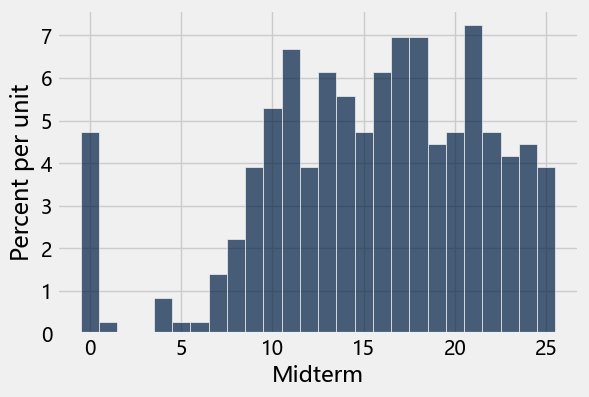

In [6]:
scores_and_sections.select('Midterm').hist(bins = np.arange(-0.5, 25.6, 1))

In [7]:
scores = scores_and_sections.column(1)

In [8]:
percentile(85, scores)

22

In [9]:
sorted_scores = np.sort(scores_and_sections.column(1))

In [10]:
0.85 * 359

305.15

In [11]:
sorted_scores.item(305)

22

In [12]:
percentile(25, scores)

11

In [13]:
percentile(50, scores)

16

In [14]:
percentile(75, scores)

20

### 2. The Bootstrap

In [15]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plt.style.use('fivethirtyeight')
import numpy as np

In [16]:
sf2019 = Table.read_table(path_data + 'san_francisco_2019.csv')

In [17]:
sf2019.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


In [18]:
sf2019.where('Job', 'Mayor')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Mayor,Administrative & Mgmt (Unrep),Mayor,342974,0,98012,440987


In [19]:
sf2019.sort('Total Compensation')

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0
Public Protection,Police,"Clerical, Secretarial & Steno",Clerk Typist,0,0,0,0
Public Protection,Sheriff,Correction & Detention,Deputy Sheriff,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Sub-Professional Engineering,StdntDsgn Train2/Arch/Eng/Plng,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Clerical, Secretarial & Steno",Executive Secretary 1,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,"Payroll, Billing & Accounting",Senior Account Clerk,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0
"Public Works, Transportation & Commerce",Airport Commission,Housekeeping & Laundry,Custodian,0,0,0,0


In [20]:
sf2019 = sf2019.where('Salary', are.above(15000))

In [21]:
sf2019.num_rows

37103

c:\Users\Skywalker\AppData\Local\Programs\Python\Python310\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


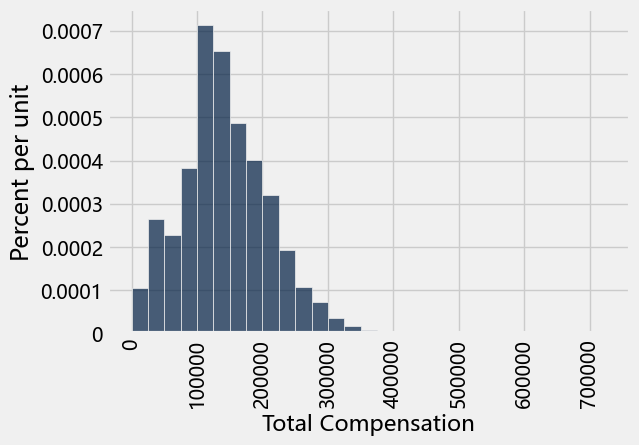

In [22]:
sf_bins = np.arange(0, 726000, 25000)
sf2019.select('Total Compensation').hist(bins = sf_bins)

In [23]:
sf2019.sort('Total Compensation', descending = True).show(2)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951


In [24]:
pop_median = percentile(50, sf2019.column('Total Compensation'))
pop_median

135747.0

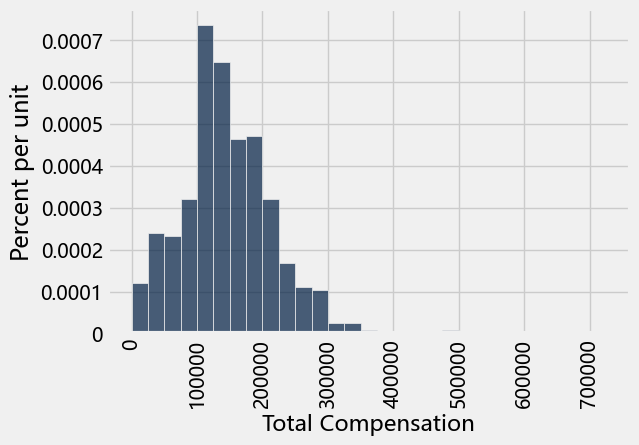

In [25]:
our_sample = sf2019.sample(500, with_replacement = False)
our_sample.hist('Total Compensation', bins = sf_bins)

In [26]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

135509.0

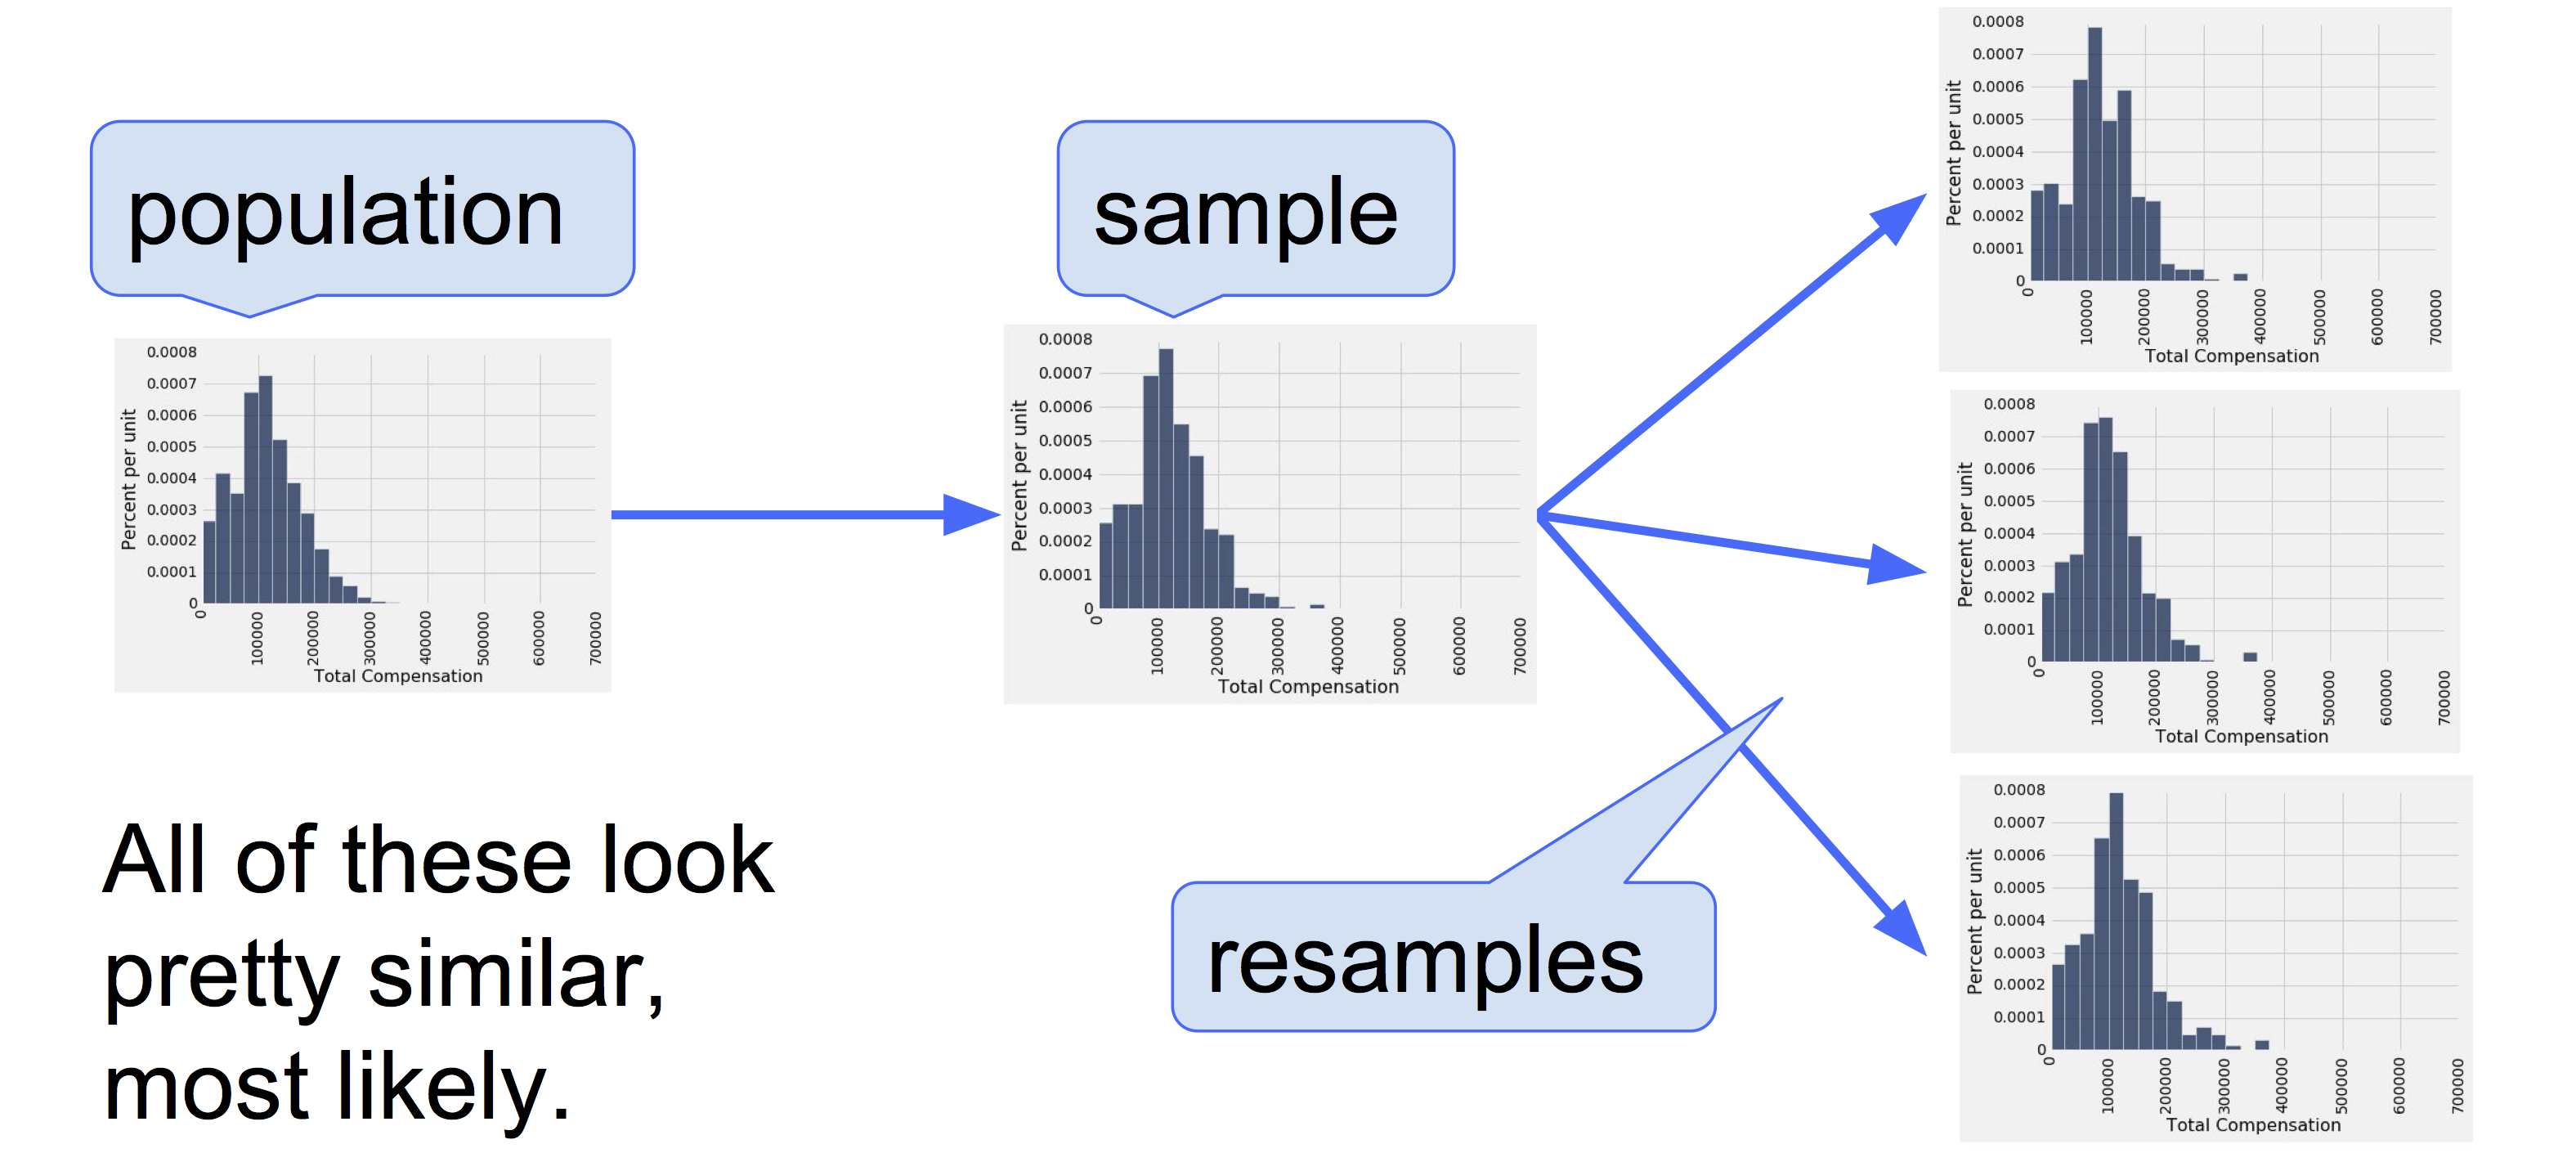

In [27]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/images/bootstrap_pic.png")

In [28]:
resample_1 = our_sample.sample()

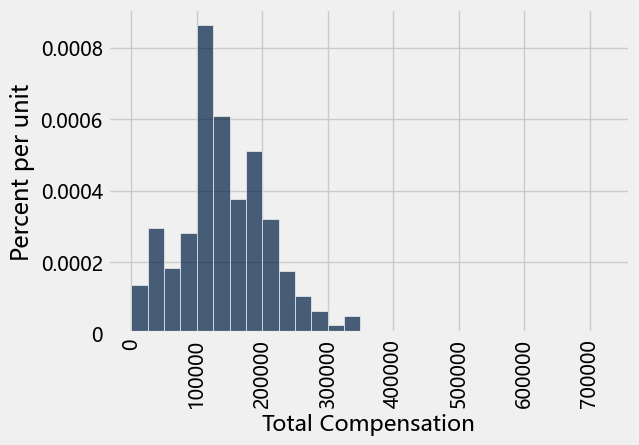

In [29]:
resample_1.select('Total Compensation').hist(bins = sf_bins)

In [30]:
resampled_median_1 = percentile(50, resample_1.column('Total Compensation'))
resampled_median_1

132364.0

In [31]:
resample_2 = our_sample.sample()
resampled_median_2 = percentile(50, resample_2.column('Total Compensation'))
resampled_median_2

135261.0

In [32]:
def one_bootstrap_median():
    resample = our_sample.sample()
    return percentile(50, resample.column('Total Compensation'))

In [33]:
one_bootstrap_median()

131740.0

In [34]:
repetitions = 5000
bstrap_median = make_array()
for i in np.arange(repetitions):
    bstrap_median = np.append(bstrap_median, one_bootstrap_median())

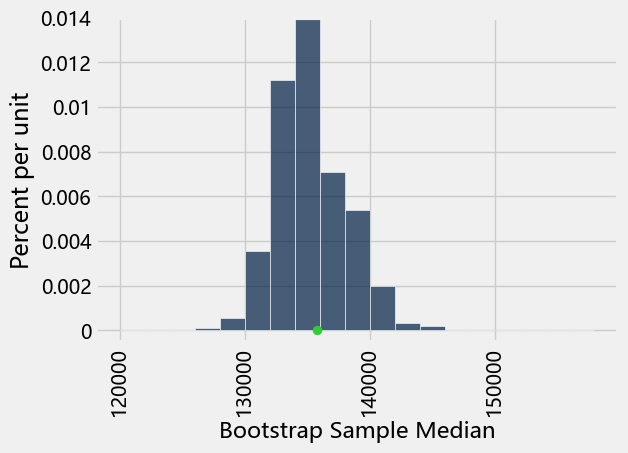

In [35]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_median)
median_bins = np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [36]:
left = percentile(2.5, bstrap_median)
left

130736.0

In [37]:
right = percentile(97.5, bstrap_median)
right

141299.0

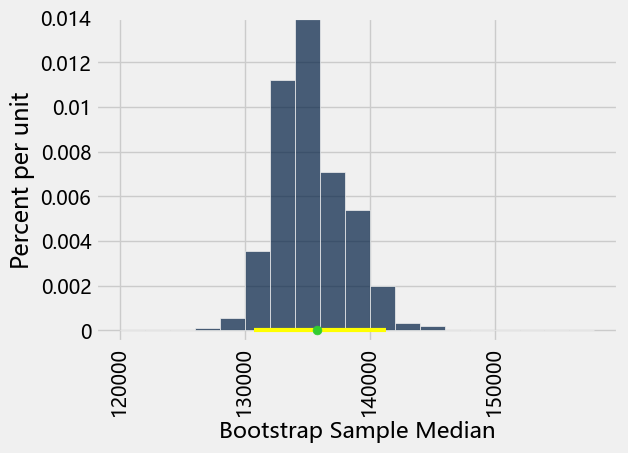

In [38]:
resampled_medians.hist(bins = median_bins)

plots.ylim(-0.000005, 0.00014)
plots.plot([left, right], [0, 0], color='yellow', lw=3, zorder=1);
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2);

In [39]:
def bootstrap_median(original_sample, repetitions):
    medians = make_array()
    for i in np.arange(repetitions):
        new_bstrap_sameple = original_sample.sample()
        medians = np.append(medians, percentile(50, new_bstrap_sameple.column('Total Compensation')))
    return medians

In [40]:
left_ends = make_array()
right_ends = make_array()

for i in np.arange(100):
    original_sample = sf2019.sample(500, with_replacement=False)
    medians = bootstrap_median(original_sample, 5000)
    left_ends = np.append(left_ends, percentile(2.5, medians))
    right_ends = np.append(right_ends, percentile(97.5, medians))

intervals = Table().with_columns(
    'Left', left_ends,
    'Right', right_ends
)    

In [42]:
intervals

Left,Right
131805,143541
124578,138041
132652,146221
127828,139051
130777,143944
126825,139454
128391,139854
129335,137934
125908,136282
130626,140156


In [47]:
pop_median

135747.0

In [48]:
intervals.where('Left', are.below(pop_median)).where('Right', are.above(pop_median)).num_rows

95

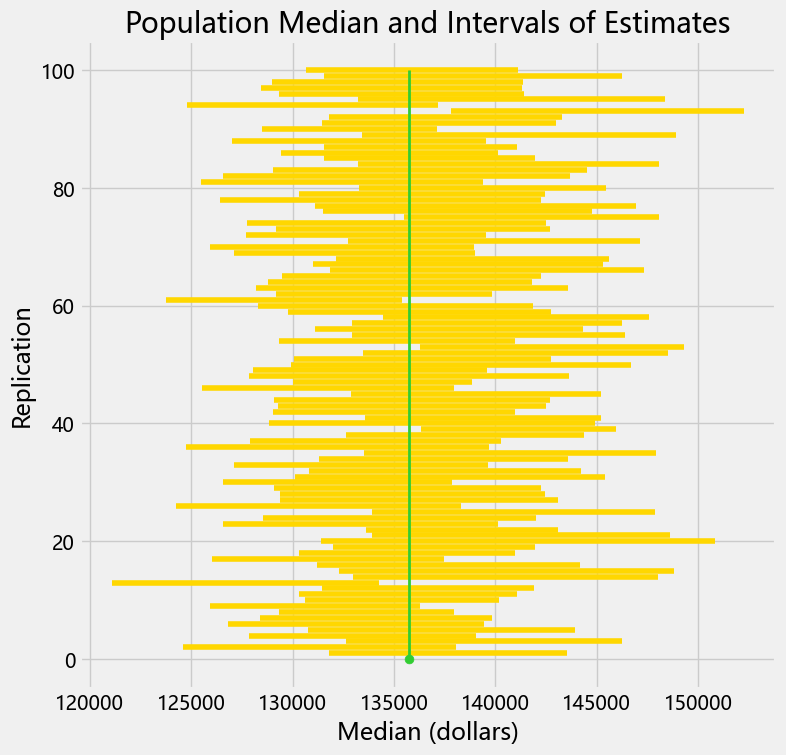

In [49]:
replication_number = np.ndarray.astype(np.arange(1, 101), str)
intervals2 = Table(replication_number).with_rows(make_array(left_ends, right_ends))

plots.figure(figsize=(8,8))
for i in np.arange(100):
    ends = intervals2.column(i)
    plots.plot(ends, make_array(i+1, i+1), color='gold')
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.plot(make_array(pop_median, pop_median), make_array(0, 100), color=parameter_green, lw=2)
plots.xlabel('Median (dollars)')
plots.ylabel('Replication')
plots.title('Population Median and Intervals of Estimates');

### 3. Confidence Intervals

In [50]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [51]:
births = Table.read_table(path_data + 'baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [52]:
ratios = births.select('Birth Weight', 'Gestational Days').with_columns('Ratio BW:GD', births.column('Birth Weight')/births.column('Gestational Days'))
ratios

Birth Weight,Gestational Days,Ratio BW:GD
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


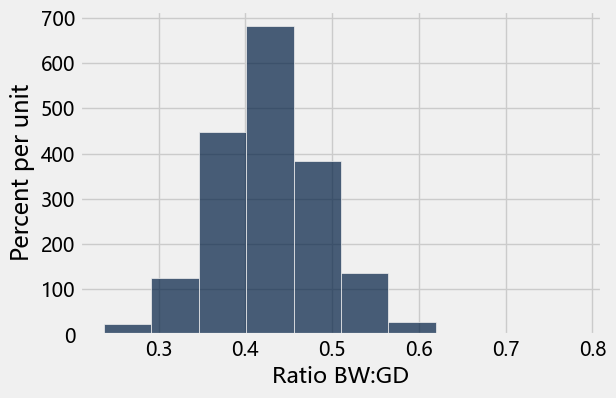

In [53]:
ratios.select('Ratio BW:GD').hist()

In [54]:
ratios.sort('Ratio BW:GD', descending = True).take(0)

Birth Weight,Gestational Days,Ratio BW:GD
116,148,0.783784


In [55]:
percentile(50, ratios.column('Ratio BW:GD'))

0.42907801418439717

In [56]:
def one_bootstrap_median():
    resample = ratios.sample()
    return percentile(50, resample.column('Ratio BW:GD'))

In [60]:
one_bootstrap_median()

0.42807017543859649

In [61]:
repetitions = 5000
bstrap_median = make_array()
for i in np.arange(repetitions):
    bstrap_median = np.append(bstrap_median, one_bootstrap_median())

In [62]:
left = percentile(2.5, bstrap_median)
right = percentile(97.5, bstrap_median)

make_array(left, right)

array([ 0.42545455,  0.43262411])

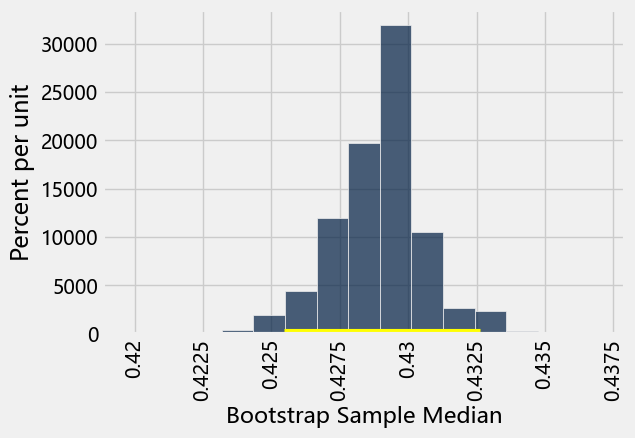

In [65]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bstrap_median)
resampled_medians.hist(bins = 15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

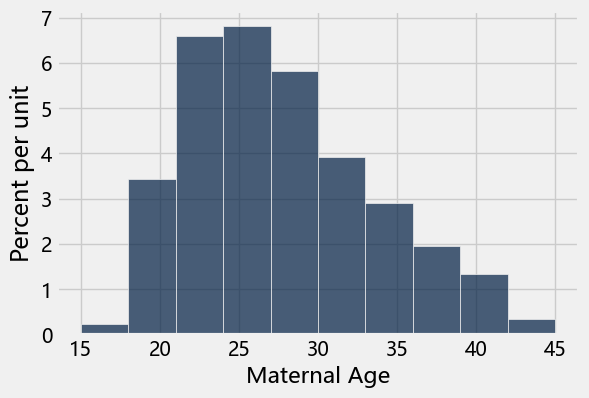

In [66]:
births.select('Maternal Age').hist()

In [67]:
np.average(births.column('Maternal Age'))

27.228279386712096

In [68]:
def one_bootstrap_mean():
    resample = births.sample()
    return np.average(resample.column('Maternal Age'))

In [69]:
repetitions = 5000
bstrap_mean = make_array()
for i in np.arange(repetitions):
    bstrap_mean = np.append(bstrap_mean, one_bootstrap_mean())

In [70]:
left  = percentile(2.5, bstrap_mean)
right = percentile(97.5, bstrap_mean)
make_array(left, right)

array([ 26.89522998,  27.5681431 ])

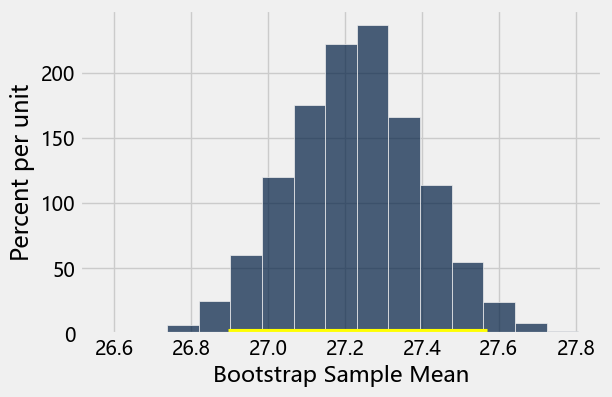

In [71]:
resampled_means = Table().with_column('Bootstrap Sample Mean', bstrap_mean)
resampled_means.hist(bins = 15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

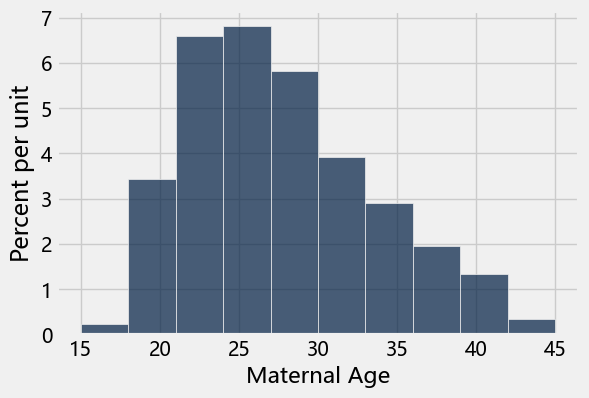

In [73]:
births.select('Maternal Age').hist()

In [74]:
left_80 = percentile(10, bstrap_mean)
right_80 = percentile(90, bstrap_mean)
make_array(left_80, right_80)

array([ 27.00851789,  27.4471891 ])

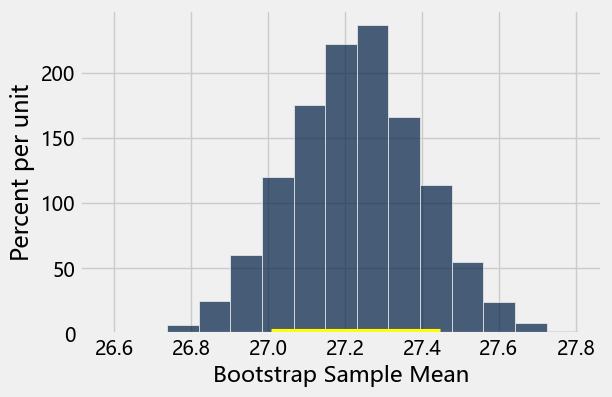

In [76]:
resampled_means.hist(bins = 15)
plots.plot([left_80, right_80], [0, 0], color='yellow', lw=8)

In [77]:
births.where('Maternal Smoker', are.equal_to(True)).num_rows / births.num_rows

0.3909710391822828

In [79]:
smoking = births.column('Maternal Smoker')
np.count_nonzero(smoking) / len(smoking)

0.3909710391822828

In [81]:
def one_bootstrap_proportion():
    resample = births.sample()
    smoking = resample.column('Maternal Smoker')
    return np.count_nonzero(smoking) / len(smoking)

In [82]:
bstrap_proportion = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    bstrap_proportion = np.append(bstrap_proportion, one_bootstrap_proportion())

In [83]:
left = percentile(2.5, bstrap_proportion)
right = percentile(97.5, bstrap_proportion)
make_array(left, right)

array([ 0.36286201,  0.41908007])

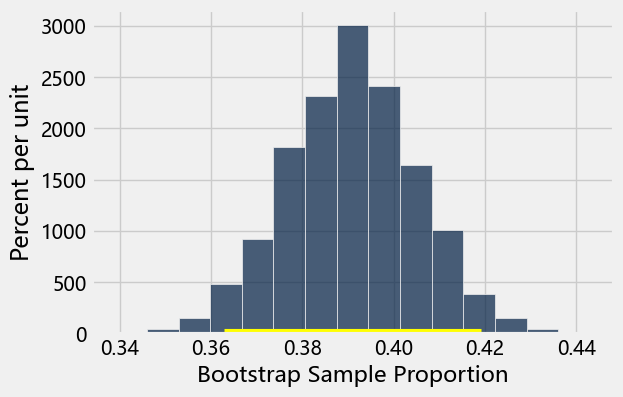

In [84]:
resampled_proportions = Table().with_column('Bootstrap Sample Proportion', bstrap_proportion)
resampled_proportions.hist(bins = 15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);

### 4. Using Confidence Intervals

In [85]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

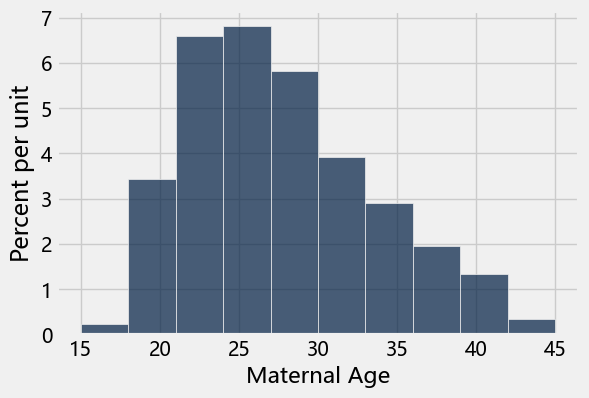

In [88]:
births = Table.read_table(path_data + 'baby.csv')
births.select('Maternal Age').hist()

In [89]:
hodgkins = Table.read_table(path_data + 'hodgkins.csv')
hodgkins

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62
173,388,239,129.04,133.33
157,370,168,85.41,81.28
160,468,151,67.94,79.26
170,341,96,150.51,80.97
163,453,134,129.88,69.24
175,529,264,87.45,56.48
185,392,240,149.84,106.99
178,479,216,92.24,73.43


In [90]:
hodgkins = hodgkins.with_column('drop', hodgkins.column('base') - hodgkins.column('month15'))
hodgkins

height,rad,chemo,base,month15,drop
164,679,180,160.57,87.77,72.8
168,311,180,98.24,67.62,30.62
173,388,239,129.04,133.33,-4.29
157,370,168,85.41,81.28,4.13
160,468,151,67.94,79.26,-11.32
170,341,96,150.51,80.97,69.54
163,453,134,129.88,69.24,60.64
175,529,264,87.45,56.48,30.97
185,392,240,149.84,106.99,42.85
178,479,216,92.24,73.43,18.81


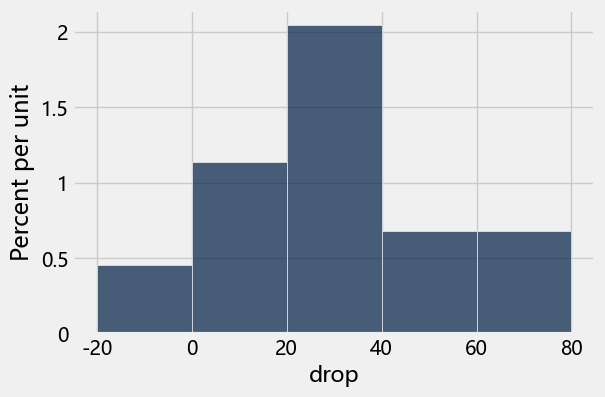

In [91]:
hodgkins.select('drop').hist(bins = np.arange(-20, 81, 20))

In [92]:
np.average(hodgkins.column('drop'))

28.615909090909096

In [93]:
def one_bootstrap_mean():
    resample = hodgkins.sample()
    return np.average(resample.column('drop'))

In [94]:
repetitions = 10000
bstrap_mean = make_array()
for i in np.arange(repetitions):
    bstrap_mean = np.append(bstrap_mean, one_bootstrap_mean())

In [95]:
left = percentile(0.5, bstrap_mean)
right = percentile(99.5, bstrap_mean)
make_array(left, right)

array([ 17.37909091,  40.24045455])

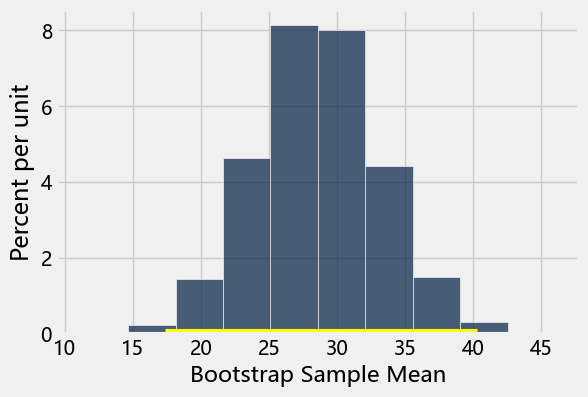

In [96]:
resampled_means = Table().with_column('Bootstrap Sample Mean', bstrap_mean)
resampled_means.hist()
plots.plot([left, right], [0, 0], color='yellow', lw=8);